# Project Eigenstrat Samples onto PCA
Idea: Find samples in eigenstrat and project them!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
    
if socket_name.startswith("bionc") or socket_name.startswith("hpc"):
    print("Leipzig Cluster detected!")
    path = "/mnt/archgen/users/hringbauer/git/projectPCA/"   
    #path = "/mnt/archgen/users/hringbauer/"
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
     
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version_info)

#from projectPCA.eigenstrat_funcs import load_genos_autoeager, update_values
from projectPCA.run import project_eigenstrat

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

Leipzig Cluster detected!
/mnt/archgen/users/hringbauer/git/projectPCA
CPU Count: 128
sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


## Test West-Eurasian HO PCA

### Do an ancient Sardinian

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528 / 531927 SNPs with MAF<0.05.


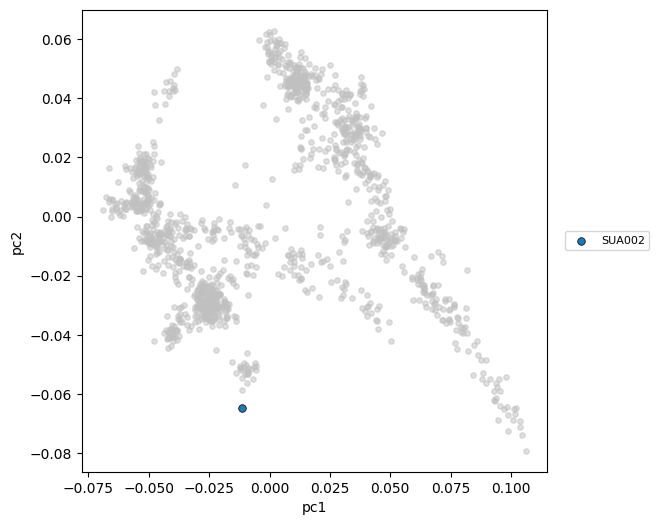

CPU times: user 8.53 s, sys: 655 ms, total: 9.19 s
Wall time: 9.26 s


,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


In [2]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="HO", es_type="default")

In [ ]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="HO", es_type="unpacked_fast")

### Do HTML output of ancient Sardinian

In [4]:
%%time
df_proj = project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="HO", es_type="default", fig_path='./figs/SUA002.html')
df_proj

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528 / 531927 SNPs with MAF<0.05.
✅ Saved interactive plot to: ./figs/SUA002.html


CPU times: user 8.06 s, sys: 759 ms, total: 8.82 s
Wall time: 14.9 s


,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


### HTML Plot with autoeager eigenstrat

In [4]:
%%time
df_proj = project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/JCH/JCH043/genotyping/pileupcaller.single",
                             plot=['pc2', 'pc1'],
                   pca="EU", es_type="autoeager", fig_path='./figs/JCH043_joscha.html')
df_proj

3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 30518 / 409586 SNPs with MAF<0.05.
✅ Saved interactive plot to: ./figs/JCH043_joscha.html


CPU times: user 8.36 s, sys: 306 ms, total: 8.67 s
Wall time: 8.67 s


,pc1,pc2,#SNP,iid
0,0.009664,-0.009025,131441,JCH043_ss


### Test: Project directly via pre-Load SNP dataframe + Autoeager

In [5]:
from projectPCA.get_proj_files import get_projection_files

In [8]:
%%time
df_snp = pd.read_csv("/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double.snp", header=None,
                     sep="\t", engine="python")
df_snp.columns = ["snp", "chr", "map",
                  "pos", "ref", "alt"]  # Set the Columns

CPU times: user 4.74 s, sys: 239 ms, total: 4.98 s
Wall time: 5 s


In [9]:
%%time
pf = get_projection_files("HO") # Load the pre-computed PC Object
dfw = pf.get_snp_weights()
df_bgrd_pcs = pf.get_projections_ref()

CPU times: user 322 ms, sys: 6.99 ms, total: 329 ms
Wall time: 340 ms


3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528 / 531927 SNPs with MAF<0.05.


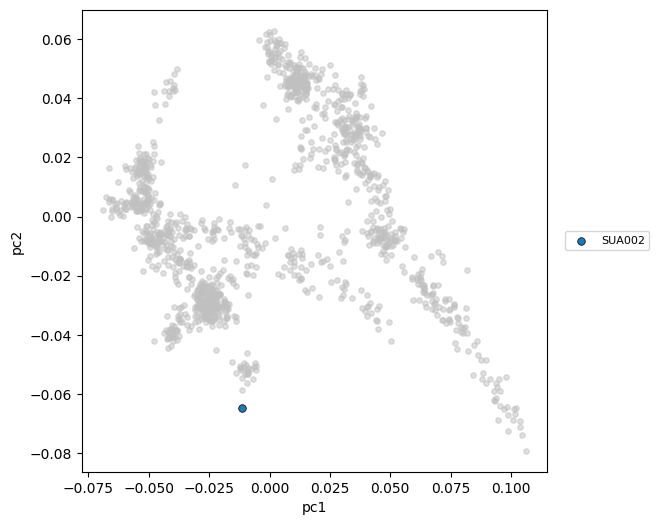

CPU times: user 1.06 s, sys: 66.1 ms, total: 1.13 s
Wall time: 1.14 s


,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


In [10]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   df_snp=df_snp, dfw=dfw, df_bgrd_pcs=df_bgrd_pcs,
                   es_type="autoeager")

# Test Ringbauer 2025 Punic eigenstrat PCA

In [ ]:
%%time
df_out = project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                   plot=False, 
                   es_type="default")

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs


Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
Filtering 130447/518388 fixed SNPs.


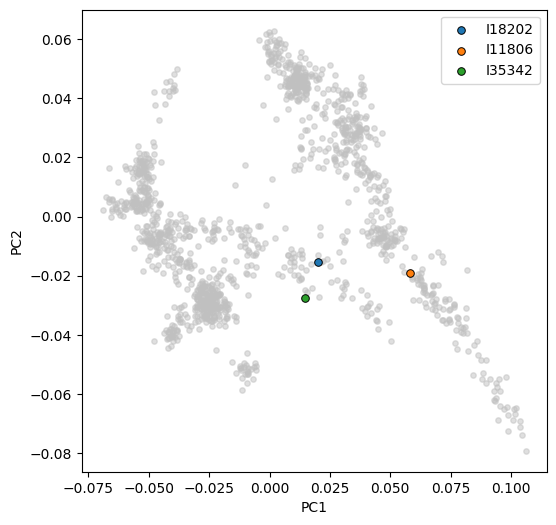

In [5]:
df_out = project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                            iids = ["I18202", "I11806","I35342"],
                            es_type="default")

# 2) Joscha's Finescale EU PCA

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 30518 / 409586 SNPs with MAF<0.05.


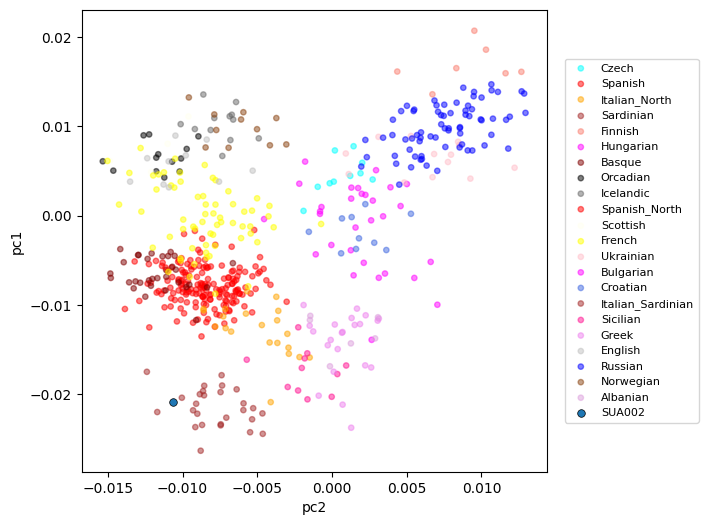

CPU times: user 7.47 s, sys: 567 ms, total: 8.04 s
Wall time: 8.08 s


,pc1,pc2,#SNP,iid
0,-0.020822,-0.010639,242672,SUA002


In [5]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="EU", es_type="default",  plot=['pc2', 'pc1'], plot_bgrd_c=True)

3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 30518 / 409586 SNPs with MAF<0.05.


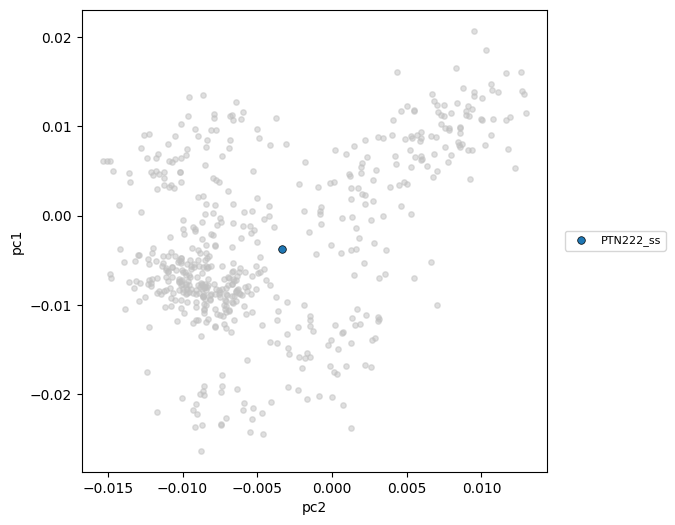

CPU times: user 5.69 s, sys: 411 ms, total: 6.1 s
Wall time: 6.15 s


,pc1,pc2,#SNP,iid
0,-0.003712,-0.00333,255193,PTN222_ss


In [6]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/SG/PTN/PTN222/genotyping/pileupcaller.single",
                   pca="EU", es_type="autoeager",  plot=['pc2', 'pc1'])

In [7]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/SG/BMG/BMG001/genotyping/pileupcaller.single",
                   pca="EU", es_type="autoeager",  plot=['pc2', 'pc1'], fig_path='./figs/BMG001_Joscha.html')

3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 30518 / 409586 SNPs with MAF<0.05.
✅ Saved interactive plot to: ./figs/BMG001_Joscha.html


CPU times: user 6.17 s, sys: 509 ms, total: 6.67 s
Wall time: 8.17 s


,pc1,pc2,#SNP,iid
0,0.005378,-0.009353,182506,BMG001_ss


In [3]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/SG/WSQ/WSQ001/genotyping/pileupcaller.single",
                   pca="EU", es_type="autoeager",  plot=['pc2', 'pc1'], fig_path='./figs/WSQ001_Joscha.html')

3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 30518 / 409586 SNPs with MAF<0.05.
✅ Saved interactive plot to: ./figs/WSQ001_Joscha.html


CPU times: user 6.56 s, sys: 362 ms, total: 6.92 s
Wall time: 7.04 s


,pc1,pc2,#SNP,iid
0,0.007394,-0.00697,167443,WSQ001_ss


In [ ]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/SG/HTA/HTA035/genotyping/pileupcaller.single",
                   pca="EU", es_type="autoeager",  plot=['pc2', 'pc1'], fig_path='./figs/WSQ001_Joscha.html')

### Project multiple IIDs

In [5]:
df_out = project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                            iids = ["I18202", "I11806","I35342"], fig_path='./figs/punic3.html',
                            es_type="default")

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
Filtering 130447 / 518388 SNPs with MAF<0.05.
✅ Saved interactive plot to: ./figs/punic3.html


In [ ]:
%%time
project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="EU", es_type="default",  plot=['pc2', 'pc1'])

## Project Test Sample of Clemens
Originating from eigenstrat in Poseidon

In [ ]:
%%time
df_out = project_eigenstrat(es_path="/mnt/archgen/users/schmid/fuer_harald/selected_samples_ancient_1240K",
                            iids = ["EV15A"],
                            es_type="eager")

3 Eigenstrat Files with 6182 Individuals and 1203962 SNPs


In [15]:
print("test")

test


### Test faster Loading of unpacked files

In [102]:
%%time
raw = np.fromfile("/mnt/archgen/users/schmid/fuer_harald/selected_samples_ancient_1240K.geno", dtype=np.uint8)

CPU times: user 142 μs, sys: 15.2 s, total: 15.2 s
Wall time: 15.2 s


In [103]:
%%time
#raw = raw[raw != 13]   # remove '\r'
raw = raw[raw != 10]   # remove '\n'
digits = raw - 48

CPU times: user 3.77 s, sys: 19.3 s, total: 23.1 s
Wall time: 23.1 s


In [ ]:
gt = update_values(col, x=[48,49,50,57], y=[2,1,0,np.nan, np.nan], copy=True) # use COPY as values overlap

In [106]:
pd.value_counts(digits)

/tmp/ipykernel_1153705/1510941687.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(digits)


9    4023503084
0    1712308480
2    1706202519
1        879001
Name: count, dtype: int64

In [121]:
col = data[:, 3000].astype("float")

In [122]:
pd.value_counts(col)

/tmp/ipykernel_1153705/4009317150.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(col)


2.0    428944
0.0    424553
9.0    350465
Name: count, dtype: int64

# Area 51

### Test Speed of Loading

In [124]:
from projectPCA.loadEigenstrat import get_eigenstrat_object, update_values # Load eigenstrat

In [128]:
es = get_eigenstrat_object("/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double", mode="autoeager")

3 Eigenstrat Files with 1 Individuals and 1233013 SNPs


In [129]:
%%time
g = es.get_geno_iid(iid="SUA002")
g

CPU times: user 18.8 ms, sys: 3.74 ms, total: 22.5 ms
Wall time: 51.6 ms


array([ 2., nan, nan, ...,  0., nan,  2.], shape=(1233013,))

In [130]:
pd.value_counts(g)

/tmp/ipykernel_1153705/4028245601.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(g)


0.0    506070
2.0    200909
Name: count, dtype: int64

### Punic data with 210 iids

In [125]:
%%time

es = get_eigenstrat_object("/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k", mode="default")

Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
CPU times: user 4.44 s, sys: 479 ms, total: 4.92 s
Wall time: 5.03 s


In [126]:
%%time
g = es.get_geno_iid(iid="I12433")
g

CPU times: user 45.8 ms, sys: 98.6 ms, total: 144 ms
Wall time: 215 ms


array([nan,  2., nan, ..., nan, nan,  2.], shape=(1207104,))

In [127]:
pd.value_counts(g)

/tmp/ipykernel_1153705/4028245601.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(g)


0.0    533682
2.0    230299
Name: count, dtype: int64

In [3]:
%%time
from projectPCA.get_proj_files import get_projection_files

pf = get_projection_files("HO") # Load the pre-computed PC Object
df_bgrd_pcs = pf.get_projections_ref()
df_bgrd_pcs.head()

CPU times: user 328 ms, sys: 4.1 ms, total: 332 ms
Wall time: 339 ms


,iid,sex,pop,pc1e,pc2e,pc1,pc2
0,ABA-035.HO,M,Karachai.HO,0.014853,0.053640,0.014853,0.053640
1,ABA-048.HO,M,Karachai.HO,0.010207,0.045873,0.010207,0.045873
2,ABA-052.HO,M,Karachai.HO,0.012713,0.047646,0.012713,0.047646
3,ABA-056.HO,M,Karachai.HO,0.011672,0.049979,0.011672,0.049979
4,ABA-065.HO,M,Karachai.HO,0.011175,0.050255,0.011175,0.050255


In [1]:
df_bgrd_pcs["pop"].value_counts()

NameError: name 'df_bgrd_pcs' is not defined

In [9]:
len(df_bgrd_pcs)

1250

In [135]:
def get_line_stats(line):
    c2= line.count("2")
    c0=line.count("0")
    print(f"{c2/c0} {c2}/{c0}")

In [134]:
first_line == "2"

False

In [137]:
%%time
with open("/mnt/archgen/users/schmid/fuer_harald/selected_samples_ancient_1240K.geno", "r") as f:
    for i in range(100):
        print(i)
        line = f.readline()
        get_line_stats(line)
    #second_line = f.readline()

0
0.19443355546844374 496/2551
1
0.27132075471698114 719/2650
2
0.41215715344699777 556/1349
3
0.2325301204819277 579/2490
4
4.199680511182109 2629/626
5
0.3700648202710666 628/1697
6
10.967455621301776 3707/338
7
0.08832807570977919 56/634
8
0.6558704453441295 648/988
9
0.38280922431865827 913/2385
10
0.8064806480648065 896/1111
11
0.1035 207/2000
12
0.3104325699745547 854/2751
13
3.8479087452471483 3036/789
14
0.9233933161953728 1796/1945
15
0.436426116838488 1016/2328
16
0.02612152186257808 92/3522
17
2.4011976047904193 2807/1169
18
0.2635064482398048 756/2869
19
3.0526315789473686 1508/494
20
58.21212121212121 3842/66
21
0.13962033067973056 456/3266
22
0.19287020109689215 633/3282
23
0.034670116429495475 134/3865
24
1.3069948186528497 1009/772
25
0.9195121951219513 1508/1640
26
4.85546875 2486/512
27
0.11543535620052771 350/3032
28
8.48936170212766 3591/423
29
0.2534031413612565 726/2865
30
9.228915662650602 2298/249
31
35.535353535353536 3518/99
32
1.791784702549575 2530/1412
33
1

In [138]:
es = get_eigenstrat_object("/mnt/archgen/users/schmid/fuer_harald/selected_samples_ancient_1240K", mode="default")

Eigenstrat packed: False
3 Eigenstrat Files with 6182 Individuals and 1203962 SNPs


In [139]:
df_snp = es.load_snp_df()

In [145]:
df_snp.iloc[20]

snp    rs147606383
chr              1
map       0.026665
pos        1045331
ref              G
alt              A
Name: 20, dtype: object

In [ ]:
with open("file.txt") as f:
    line = next(l for i, l in enumerate(f) if i == x)

In [10]:
pd.value_counts(first_line)

/tmp/ipykernel_1153705/1400727826.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(first_line)
/tmp/ipykernel_1153705/1400727826.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts(first_line)


9     3135
0     2551
2      496
\n       1
Name: count, dtype: int64

In [78]:
row = data[:, -1]

In [74]:
pd.value_counts(row)

/tmp/ipykernel_1147579/1881045159.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(row)


57    3305
48    1456
50    1421
10       1
Name: count, dtype: int64

In [40]:
pd.value_counts(data[0,:8000])

/tmp/ipykernel_1153705/512187422.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data[0,:8000])


9    3975
0    3328
2     697
Name: count, dtype: int64

In [41]:
pd.value_counts(first_line[:8000])

/tmp/ipykernel_1153705/2192557743.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(first_line[:8000])
/tmp/ipykernel_1153705/2192557743.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts(first_line[:8000])


9     3135
0     2551
2      496
\n       1
Name: count, dtype: int64

In [ ]:
first_line

In [94]:
d = digits[:6000]
x = np.array([s for s in first_line[:6000]], dtype="int")

np.all(d ==x)

np.True_

In [97]:
np.all(data[0,:1000]==x[:1000])

np.True_

In [96]:
len(first_line)

6183

In [146]:
data = digits.reshape(1203962, 6182)

In [148]:
data[:,0]

array([9, 9, 9, ..., 9, 9, 9], shape=(1203962,), dtype=uint8)

In [132]:
pd.value_counts(digits)

/tmp/ipykernel_1153705/1510941687.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(digits)


9    4023503084
0    1712308480
2    1706202519
1        879001
Name: count, dtype: int64